# Contexto

O contexto do desafio gira em torno dos resultados do ENEM 2016 (disponíveis no arquivo train.csv). Este arquivo, e apenas ele, deve ser utilizado para todos os desafios. Qualquer dúvida a respeito das colunas, consulte o [Dicionário dos Microdados do Enem 2016](https://s3-us-west-1.amazonaws.com/acceleration-assets-highway/data-science/dicionario-de-dados.zip).

Alguns estudantes decidem realizar prova do ENEM de forma precoce, como um teste (coluna IN_TREINEIRO). Neste desafio, você deve criar um modelo de classificação binária para inferir a mesma. Os resultados possíveis da sua resposta devem ser “0” ou “1”.

Salve sua resposta em um arquivo chamado answer.csv com duas colunas: `NU_INSCRICAO` e `IN_TREINEIRO`.

# Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
sns.set()
pd.options.display.max_columns = 200

# Análise de dados

In [5]:
df_train = pd.read_csv('train.csv', index_col='NU_INSCRICAO')
df_test = pd.read_csv('test.csv', index_col='NU_INSCRICAO')

In [8]:
df_train.head()

,Unnamed: 0,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_SABATISTA,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_MACA,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,IN_CERTIFICADO,NO_ENTIDADE_CERTIFICACAO,CO_UF_ENTIDADE_CERTIFICACAO,SG_UF_ENTIDADE_CERTIFICACAO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027,Q028,Q029,Q030,Q031,Q032,Q033,Q034,Q035,Q036,Q037,Q038,Q039,Q040,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,1,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
2c3acac4b33ec2b195d77e7c04a2d75727fad723,2,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECD

In [9]:
df_test.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ba0cc30ba34e7a46764c09dfc38ed83d15828897,43,RS,19,F,1,1,1,3,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,495.3,593.3,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,H,B,B,C,D,A
177f281c68fa032aedbd842a745da68490926cd2,15,PA,24,M,3,2,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,B,A,A,C,D,A
6cf0d8b97597d7625cdedc7bdb6c0f052286c334,29,BA,16,F,2,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,0,0,559.1,529.3,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,F,G,B,B,A,NaN,D
5c356d810fa57671402502cd0933e5601a2ebf1e,41,PR,17,F,1,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,475.0,557.8,542.0,1,1.0,120.0,120.0,80.0,120.0,40.0,480.0,E,E,E,C,B,B,C,A
df47c07bd881c2db3f38c6048bf77c132ad0ceb3,53,DF,19,F,1,1,1,1,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,440.5,596.1,594.2,1,1.0,160.0,160.0,160.0,160.0,80.0,720.0,E,E,E,B,B,B,D,A


As contagens das classes de `IN_TREINEIRO`:

In [14]:
df_train['IN_TREINEIRO'].value_counts()

0    11947
1     1783
Name: IN_TREINEIRO, dtype: int64

## Tabelas de contingência

Proporções de candidatos de acordo com status de conclusão do ensino médio, treineiros ou não

In [48]:
tab = pd.crosstab(df_train['TP_ST_CONCLUSAO'], df_train['IN_TREINEIRO'],
            margins=True, margins_name='Total', normalize=True)*100

tab.index = ['Já concluí o Ensino Médio',
'Estou cursando e concluirei o Ensino Médio em 2016',
'Estou cursando e concluirei o Ensino Médio após 2016',
'Não concluí e não estou cursando o Ensino Médio',
'Total'
]
tab.index.name='TP_ST_CONCLUSAO'

tab

IN_TREINEIRO,0,1,Total
TP_ST_CONCLUSAO,,,
Já concluí o Ensino Médio,47.516387,0.000000,47.516387
Estou cursando e concluirei o Ensino Médio em 2016,31.194465,0.000000,31.194465
Estou cursando e concluirei o Ensino Médio após 2016,3.809177,12.986162,16.795339
Não concluí e não estou cursando o Ensino Médio,4.493809,0.000000,4.493809
Total,87.013838,12.986162,100.000000


Proporções de candidatos de até 24 anos, treineiros ou não

In [36]:
pd.crosstab(df_train['NU_IDADE'][df_train['NU_IDADE']<24], df_train['IN_TREINEIRO'],
            margins=True, margins_name='Total', normalize=True)*100

IN_TREINEIRO,0,1,Total
NU_IDADE,,,
13,0.000000,0.009466,0.009466
14,0.066263,0.132526,0.198788
15,0.037864,2.536918,2.574782
16,1.486179,8.150322,9.636501
17,19.235138,5.660735,24.895873
18,21.175691,0.388111,21.563802
19,13.773192,0.000000,13.773192
20,9.806891,0.000000,9.806891
21,7.165846,0.000000,7.165846


Proporções de candidatos por gênero, treineiros ou não

In [51]:
pd.crosstab(df_train['TP_SEXO'], df_train['IN_TREINEIRO'],
            margins=True, margins_name='Total', normalize=True)*100

IN_TREINEIRO,0,1,Total
TP_SEXO,,,
F,53.372178,8.470503,61.84268
M,33.641661,4.515659,38.15732
Total,87.013838,12.986162,100.00000


## Conclusões

Na documentação do exame, há a seguinte nota técnica:

> 3. Foi considerado treineiro o inscrito que tinha menos de 18 anos no primeiro dia de realização do exame (05/11/2016) e que não havia concluído o ensino médio e não o concluiria em 2016

Portanto, as features mais prováveis que identificam o aluno:

- `TP_ST_CONCLUSAO`: Situação de conclusão do Ensino Médio. Como visto na análise, todos os treineiros estava em fase de conclusão do ensino médio (3o ou 4o. ano).

- `NU_IDADE`: Idade do aluno. É possível identificar exatamente os alunos treineiros menores de idade, de acordo com a nota técnica

# Preprocessamento

In [61]:
y_train = df_train['IN_TREINEIRO']
X_train = df_train[df_test.columns].copy()

X_test = df_test.copy()

In [113]:
X_train['CONCL_MED'] = (X_train['TP_ST_CONCLUSAO']==3).astype('int')
X_test['CONCL_MED'] = (X_test['TP_ST_CONCLUSAO']==3).astype('int')

In [70]:
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

In [102]:
feat = ['CONCL_MED','NU_IDADE']

In [114]:
data_tr = ColumnTransformer([
    ('fun', FunctionTransformer(func=None), ['CONCL_MED', 'NU_IDADE']),
], remainder='drop')

In [115]:
data_tr.fit_transform(X_train)

array([[ 0, 24],
       [ 0, 17],
       [ 1, 21],
       ...,
       [ 1, 15],
       [ 0, 36],
       [ 0, 17]])

# Modelo

In [141]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [122]:
mod = DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [123]:
pipe = Pipeline([
    ('data_tr', data_tr),
    ('model', mod)
])

In [124]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('data_tr',
                 ColumnTransformer(transformers=[('fun', FunctionTransformer(),
                                                  ['CONCL_MED', 'NU_IDADE'])])),
                ('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=2))])

Matriz de confusão nos dados de validação

In [125]:
metrics.confusion_matrix(y_train, pipe.predict(X_train))

array([[11947,     0],
       [   41,  1742]])

Curva precision-recall

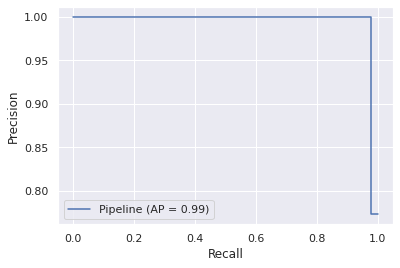

In [158]:
metrics.plot_precision_recall_curve(pipe, X_train, y_train)

[Text(133.92000000000002, 181.2, 'CONCL_MED <= 0.5\nentropy = 0.557\nsamples = 13730\nvalue = [11947, 1783]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 11424\nvalue = [11424, 0]'),
 Text(200.88000000000002, 108.72, 'IDADE <= 17.5\nentropy = 0.772\nsamples = 2306\nvalue = [523, 1783]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 1742\nvalue = [0, 1742]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.376\nsamples = 564\nvalue = [523, 41]')]

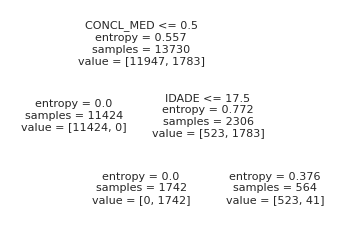

In [163]:
plot_tree(pipe.named_steps['model'], feature_names=['CONCL_MED', 'IDADE'])

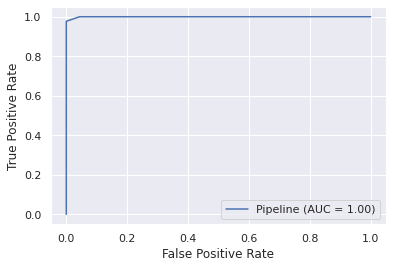

In [128]:
metrics.plot_roc_curve(pipe, X_train, y_train)

# Respostas

In [130]:
preds = pipe.predict(X_test)

In [133]:
df_out = pd.DataFrame({
    'NU_INSCRICAO': X_test.index,
    'IN_TREINEIRO': preds
})

In [137]:
df_out.to_csv('answer.csv', index=False)

In [138]:
!codenation test -c enem-4

Versão: 1.0.14

Usando arquivo de configuração: /home/angelo/.codenation.yml
============================= test session starts ==============================
platform linux -- Python 3.7.7, pytest-5.4.3, py-1.9.0, pluggy-0.13.1 -- /home/angelo/anaconda3/bin/python
cachedir: .pytest_cache
rootdir: /home/angelo/codenation/enem-4
collecting ... collected 1 item

test_main.py::test_0 PASSED                                              [100%]

============================== 1 passed in 0.40s ===============================

Parabéns! Você já pode começar a resolver o desafio. Boa sorte!


In [139]:
!codenation submit -c enem-4

Versão: 1.0.14

Usando arquivo de configuração: /home/angelo/.codenation.yml

Executando testes...

{"score": 99.73741794310722}
Preparando code review... 100% |████████████████████████████████████████|  [6s:0s]
Códigos submetidos com sucesso! 

Sua nota é: 99.737418

Parabéns! Você superou este desafio!

O que fazer agora?
- Você pode continuar sua jornada escolhendo um novo desafio em https://www.codenation.com.br
- Você pode ajudar outros desenvolvedores revisando códigos ou respondendo dúvidas no forum do desafio
- Lembre-se que ensinar é uma ótima forma de ganhar reconhecimento e gera um bom karma ;)
